# Gradient Shows Direction of Steepest Ascent

The gradient of a function "points" towards the direction at which the function increases the most. 

To see how everything works, consider a function $f(\vec{x})$ (with $\vec{x}$ and $N$-dimensional vector) evaluated at some $\vec{x} ^\prime =\vec{x} + \delta \vec{x}$ (with $\delta \vec{x}$ small). Then, we can write

$$
f(\vec{x} + \delta \vec{x}) =  f(\vec{x}) + \delta \vec{x} \cdot \vec\nabla f(\vec{x})  + \dots 
$$
with $\vec\nabla f(\vec{x}) \equiv \dfrac{\partial f(y_1,y_2,\dots,N)}{\partial y_i}\Big|_{\vec{y}=\vec{x}}$.


It becomes clear at this point that $f(\vec{x})$ becomes maximally increased when $\delta \vec{x}$ is parallel to $ \vec\nabla f(\vec{x})$, i.e. for $\vec{x}^\prime = \vec{x} + \alpha \ \vec\nabla f(\vec{x})$ (with some $\alpha >0$). Also, $f(\vec{x})$ is maximally decreased for  $\vec{x}^\prime = \vec{x} - \alpha \ \vec\nabla f(\vec{x})$ (with some $\alpha >0$).

One can easily understand this in the case $N=1,2,3$ as we can simply draw vectors and see what happens, but you can see <a href="#1">footnote <sup>1</sup></a> for a general proof. 


### Gradient Acsent/Descent
We would like to maximize or minimize $f(\vec{x})$. To do this, we can exploit the previous observation by starting at some point $\vec{x}$ and iteratively update $\vec{x} \to \vec{x} \pm \alpha \ \vec\nabla f(\vec{x})$, until maximization ($+$) or minimization ($-$) occurs (say if $\vec\nabla f(\vec{x})$ becomes very small).  

The Gradient Acsent/Descent algorithm is maybe the simplest optimization algorith, as the only thing that needs is the derivative of the function. However, stopping conditions and local minima/maxima are a huge problem.
 
 
 
 
 
 
 <br>
 <br>
 <br>
 <br>
 <br>
 
 
---
<p id="#1" style="font-size:8pt" ><sup>1</sup>
Basically, this statement comes from the fact that for two $R^N$ vectors, $\vec{a},\vec{b}$, it holds that $|\vec{a}\cdot \vec{b}| \leq ||\vec{a}||||\vec{b}||$. Here is the proof:
<br>
We start by defining the inner product as $$\vec{a}\cdot \vec{b} \equiv \displaystyle\sum_i a_i b_i.$$ Therefore, $$\vec{a}\cdot \vec{a} = || \vec a ||^2 \geq 0.$$
<br>
With these definitions, we write
$$
\Big|\Big|\vec{x} - \dfrac{\vec{x}\cdot \vec{y}}{||\vec{y}||^2}\vec{y} \Big|\Big|^2 \geq 0 
\Rightarrow 
||\vec{x}||^2 + \dfrac{(\vec{x}\cdot \vec{y})^2}{||\vec{y}||^2} -2 \dfrac{(\vec{x}\cdot \vec{y})^2}{||\vec{y}||^2} \geq 0 
\Rightarrow \\
||\vec{x}||^2 - \dfrac{(\vec{x}\cdot \vec{y})^2}{||\vec{y}||^2} \geq 0 
\Rightarrow
(\vec{x}\cdot \vec{y})^2 \leq ||\vec{x}||^2 ||\vec{y}||^2 
\Rightarrow \\
|\vec{x}\cdot \vec{y}| \leq ||\vec{x}|| ||\vec{y}|| \;.
$$
<br>
Note also that this generalizes trivially to $C^N$ spaces to $\langle y|x \rangle \leq ||\vec{x}|| ||\vec{y}||$, with  $\langle y|x \rangle \displaystyle \sum_i y^{*}_i x_i$.
</p>

# AdaDelta


One of the things that can make GD unable to converge, is the learning rate, which has to be tunned. This can be avoided by using *AdaDelta* [[1212.5701](https://arxiv.org/abs/1212.5701)] that tries to adjust the learning as the algorithm proceeds. 

The update of $\vec{x}$, according to this is: 

$$
\vec{x}^{(t)} = \vec{x}^{(t-1)} - \delta \vec{x}^{(t)}  \;,
$$
with
$$
\delta \vec{x}^{(t)} = \dfrac{\sqrt{ \mathbb{E}[\delta \vec{x}^2]^{(t-1)} + \epsilon}  }{\sqrt{ \mathbb{E}[g^2]^{(t)} + \epsilon}} {\bf \nabla}_\vec{x} f(\vec{x}^{(t-1)}) \;, 
$$
where the *decaying averages* are
$$
\mathbb{E}[\delta \vec{x}^2]^{(t)} \equiv \gamma \ \mathbb{E}[\delta \vec{x}^2]^{(t-1)} +
(1-\gamma) \ \left( \delta \vec{x}^{(t)} \right)^2 \;, 
\\
\mathbb{E}[g^2]^{(t)} \equiv \gamma \ \mathbb{E}[g^2]^{(t-1)} +
(1-\gamma) \ \left( {\bf \nabla}_\vec{x} f(\vec{x}^{(t-1)}) \right) \cdot \left( {\bf \nabla}_\vec{x} f(\vec{x}^{(t-1)}) \right)\;, 
$$
for $\mathbb{E}[X]^{(0)} = 0$. 

The parameters $\gamma$ and $\epsilon$ are free, but generally $\gamma \approx 1$ and $\epsilon \ll 1$. Common choice is $\gamma \approx 0.95$ and $\epsilon \ll 10^{-6}$.

### The algorithm

With these definitions, the AdaDelta algorithm is:

1. Initialize $\mathbb{E}[g^2]^{(0)} =0$ and $\mathbb{E}[\delta \vec{x}^2]^{(0)}=0$
1. Loop t=1,2,...  until some condition is satisfied
    1. Calculate ${\bf \nabla}_\vec{x} f(\vec{x}^{(t-1)})$
    1. Accumulate $\mathbb{E}[g^2]^{(t)}$
    1. Calculate $\delta \vec{x}^{t} = \dfrac{\sqrt{ \mathbb{E}[\delta \vec{x}^2]^{(t-1)} + 
    \epsilon}  }{\sqrt{ \mathbb{E}[g^2]^{(t)} + \epsilon}} {\bf \nabla}_\vec{x} f(\vec{x}^{(t-1)})$
    1. Accumulate $\mathbb{E}[\delta \vec{x}^2]^{(t)}$
    1. Update $\vec{x}^{(t+1)} = \vec{x}^{(t)} - \delta \vec{x}^{(t)}$  
1. Done

---

## RMSprop

There is a variant of AdaDelta called *RMSprop*, which uses
$$
\delta \vec{x}^{(t)} = \dfrac{\alpha}{\sqrt{ \mathbb{E}[g^2]^{(t)} + \epsilon}} {\bf \nabla}_\vec{x} f(\vec{x}^{(t-1)}) \;, 
$$
with $\alpha \ll 1$ some constant (typically $\alpha  =10^{-3}$).


Lets make a Gradient Descent minimizer class to see how it works (maximization quite trivial once you get how it works).

In [1]:
import numpy as np


import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

This is how the target should look like

In [2]:
class targetFunc:
    def __init__(self,func,h=1e-5):
        self.function =func
        self.h=h
        
    def __call__(self,x):
        return self.function(x)
    
    def Grad(self,x):
        x0=[_ for _ in x]
        x1=[_ for _ in x]
        
        grad=[]
        for dim in range(len(x)):
            x0[dim]=x[dim]-self.h
            x1[dim]=x[dim]+self.h
            
            dfdx0=self.function(x0) 
            dfdx1=self.function(x1) 

            x0[dim]=x[dim]
            x1[dim]=x[dim]
            
            grad.append((dfdx1-dfdx0)/(2*self.h))
        
        return grad
            
        

In [3]:
class GradientDescent:
    
    def __init__(self):
            pass
        
    def update(self):
        pass
    
    
    def run(self,tol=1e-5, step_break=100,max_step=5000):
        '''        
        tol, step_break: stop when the gradient becomes smaller than tol for step_break consecutive steps
        max_step: maximum number of steps
        '''
        _s=0
        count_steps=1
        while count_steps<=max_step:
            _check=self.update()
            
            count_steps+=1             
                
            
            if _check<tol:
                _s+=1
            else:
                _s=0
            
            if _s>step_break:
                break
                
        return self.x

In [4]:
class VanillaGD(GradientDescent):
    def __init__(self,target,x0,alpha=1e-1):
        '''
        target: the target function to be minimized, with target.Gard its gradient
        x0: starting point
        alpha: the alpha parameter
        
        '''
        
        self.target=target
        self.alpha=alpha
        
        self.steps=[]
        self.x=[_ for _ in x0]
        
        
    def update(self):
        grad=self.target.Grad(self.x)
        
        _g2=0
        _x2=0
        for i,g in enumerate(grad):
            self.x[i]=self.x[i]-self.alpha*g
            _g2+=g**2
            _x2=self.x[i]**2

        _g2=np.sqrt(_g2/_x2)
        
        self.steps.append(self.x[:])
        
        
        return _g2*self.alpha


In [5]:
class AdaDeltaGD(GradientDescent):
    '''Implementation of AdaDelta.'''
    
    def __init__(self,target,x0,gamma=0.95,epsilon=1e-6,alpha=1):
        '''
        target: the target function to be minimized, with target.Gard its gradient
        x0: starting point
        gamma: the decaying parameter
        epsilon: safety parameter (to avoid division by 0)
        alpha: a learning rate that multiplies the rate of AdaDelta. 
        '''
        self.target=target
        self.gamma=gamma
        self.epsilon=epsilon
        self.alpha=alpha
        
        self.steps=[]
        self.x=[_ for _ in x0]
        
        # counters for the decaying means of the gradient and dx         
        self.gE=[0 for _ in self.x]
        self.dxE=[0 for _ in self.x]
        
        #lists to store the changes in x         
        self.dx=[0 for _ in self.x]

    def update(self):
        ''' '''
        grad=self.target.Grad(self.x)

        
        _g2=0
        _x2=0

        for i,g in enumerate(grad):
            self.gE[i]=self.gamma*self.gE[i] + (1-self.gamma)*g**2 
            self.dx[i]=np.sqrt( (self.dxE[i]+self.epsilon)/(self.gE[i]+self.epsilon)  )*g*self.alpha
            
            self.dxE[i]=self.gamma*self.dxE[i] + (1-self.gamma)*self.dx[i]**2
            
            self.x[i]=self.x[i] - self.dx[i]
            
            
            _g2+=self.dx[i]**2
            _x2+=self.x[i]**2
        
        _g2=np.sqrt(_g2/_x2)
        self.steps.append(self.x[:])
        
        return _g2*self.alpha


In [6]:
class RMSpropGD(GradientDescent):
    '''Implementation of RMSprop.'''
    
    def __init__(self,target,x0,gamma=0.95,epsilon=1e-6,alpha=1):
        '''
        target: the target function to be minimized, with target.Gard its gradient
        x0: starting point
        gamma: the decaying parameter
        epsilon: safety parameter (to avoid division by 0)
        alpha: a learning rate that multiplies the rate of AdaDelta. 
        '''
        self.target=target
        self.gamma=gamma
        self.epsilon=epsilon
        self.alpha=alpha
        
        self.steps=[]
        self.x=[_ for _ in x0]
        
        # counters for the decaying means of the gradient and dx         
        self.gE=[0 for _ in self.x]

    def update(self):
        ''' '''
        grad=self.target.Grad(self.x)

        
        _g2=0
        _x2=0

        for i,g in enumerate(grad):
            self.gE[i]=self.gamma*self.gE[i] + (1-self.gamma)*g**2 
            self.dx=self.alpha/np.sqrt( (self.gE[i]+self.epsilon)  )*g
            
            
            self.x[i]=self.x[i] - self.dx
            
            
            _g2+=self.dx**2
            _x2+=self.x[i]**2
        
        _g2=np.sqrt(_g2/_x2)
        self.steps.append(self.x[:])
        
        return _g2*self.alpha


Example:

Let's minimize $$ f(x_1,x_2) = 1- e^{ -( x_1^2 + x_2^2)  }  $$

In [7]:
def func(x):
    return 1-np.exp(-(x[0]**2+x[1]**2))

In [8]:
target=targetFunc(func)

In [9]:
# GD=VanillaGD(target,[-1,.2],alpha=1e-1)
GD=AdaDeltaGD(target,[-1,.2],gamma=1-1e-2,epsilon=1e-6,alpha=1)
# GD=RMSpropGD(target,[-1,.2],gamma=1-1e-3,epsilon=1e-5,alpha=1e-2)


In [10]:
GD.run(tol=1e-5, step_break=100,max_step=50000),len(GD.steps)

([-2.2879766767007975e-12, 7.014104246949426e-14], 795)

<IPython.core.display.Javascript object>


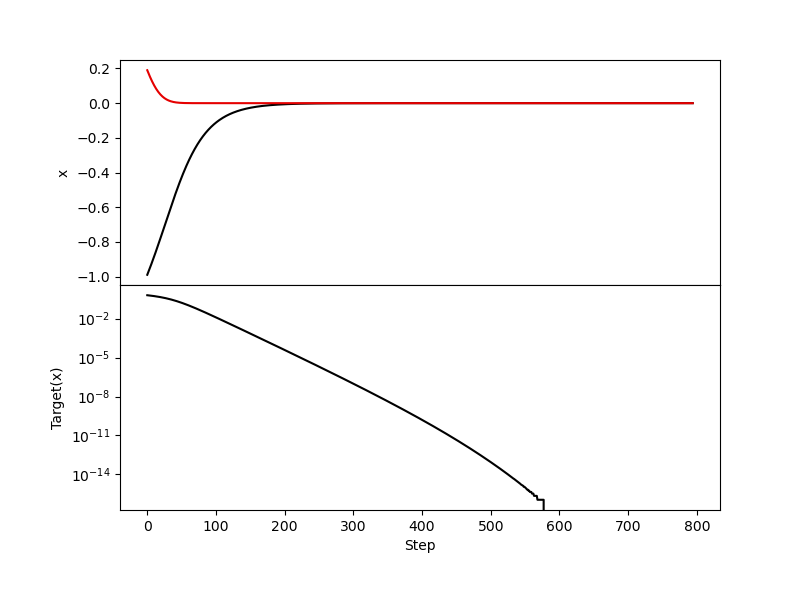

In [11]:
fig=plt.figure(figsize=(8,6))
fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.1,hspace=0)
#=============================================================================#


sub = fig.add_subplot(211)
sub.get_xaxis().set_visible(False)
sub.plot(np.array(GD.steps)[:,0],c='xkcd:black')
sub.plot(np.array(GD.steps)[:,1],c='xkcd:red')

sub.set_ylabel('x')
# sub.set_xscale('log')
sub.set_yscale('linear')


sub = fig.add_subplot(212)
sub.plot([target(i) for i in GD.steps],c='xkcd:black')

sub.set_ylabel('Target(x)')

# sub.set_xscale('log')
sub.set_yscale('log')

sub.set_xlabel('Step')

plt.show()